# Step-1 : Load Libraries, Read Reference and Scanned Images

In [11]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [12]:
# Saving image path to an variable
img_path_1 = 'Homography/refDatabricks.jpg'

img_path_2 = 'Homography/databricks.jpg'

# Load BGR (OpenCV default)
im1 = cv.imread(img_path_1)
im1 = cv.cvtColor(im1, cv.COLOR_BGR2RGB)
im2 = cv.imread(img_path_2)
im2 = cv.cvtColor(im2, cv.COLOR_BGR2RGB)

assert im1 is not None, f"Image at {img_path_1} could not be read."
assert im2 is not None, f"Image at {img_path_2} could not be read."

Text(0.5, 1.0, 'Scanned')

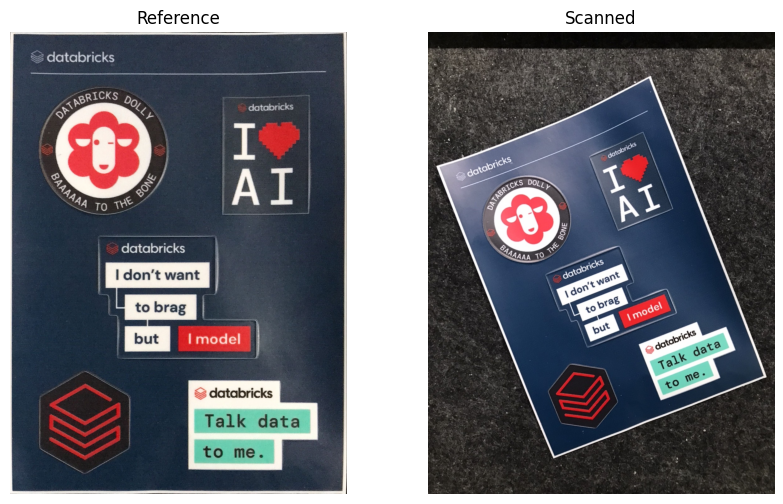

In [13]:
plt.figure(figsize=[10,6]);
plt.subplot(121); plt.axis('off'); plt.imshow(im1); plt.title("Reference")
plt.subplot(122); plt.axis('off'); plt.imshow(im2); plt.title("Scanned")

# Step 2: Find keypoints in both Images

In [14]:
import time
# Convert images to grayscale
im1_gray = cv.cvtColor(im1, cv.COLOR_BGR2GRAY)
im2_gray = cv.cvtColor(im2, cv.COLOR_BGR2GRAY)

# Initiate SIFT detector
sift = cv.SIFT_create()

# Find keypoints and descriptors with SIFT

keypoints1, descriptors1 = sift.detectAndCompute(im1_gray,None)
keypoints2, descriptors2 = sift.detectAndCompute(im2_gray,None)

idx = 1
print ("keypoint angle: ", keypoints1[idx].angle)
print ("keypoint size:  ", keypoints1[idx].size)
print ("keypoint x:     ", keypoints1[idx].pt[0])#coordinates (keypoints (angalie,size(x,y))),descriptors (128-dim vector) n1x 128  NX128
print ("keypoint y:     ", keypoints1[idx].pt[1])
print ("")
print ("descriptor: ", descriptors1[idx])
print ("")

#128 >>comes from difference of gradients in 16 cells (4x4) with 8 orientations each

keypoint angle:  0.4342041015625
keypoint size:   3.24059796333313
keypoint x:      3.844083547592163
keypoint y:      26.785608291625977

descriptor:  [ 17.   0.   0.   0.   0.   0.   0.   4. 211.   4.   0.   0.   0.   0.
   0.  32. 135.   7.   2.  18.   7.   0.   0.   3.   0.   0.   4.  28.
  25.   2.   0.   0.  20.   0.   0.   0.   0.   0.   0.   2. 211.   3.
   0.   0.   0.   0.   0.  34. 153.   3.   1.   5.  19.   6.   1.  10.
   0.   0.   1.   5.  25.  19.  10.   3.  20.   0.   0.   0.   0.   0.
   0.   1. 211.   8.   0.   0.   0.   0.   0.  11. 144.   7.   1.   2.
  12.   5.   1.   4.   1.   1.   2.   6.  23.   5.   3.   4.  14.   1.
   0.   0.   0.   0.   0.   1. 211.  34.   0.   0.   0.   0.   0.  10.
 108.  22.   2.   2.   2.   0.   1.   4.   0.   0.   1.   4.  19.   4.
   3.   0.]



Text(0.5, 1.0, 'Scanned')

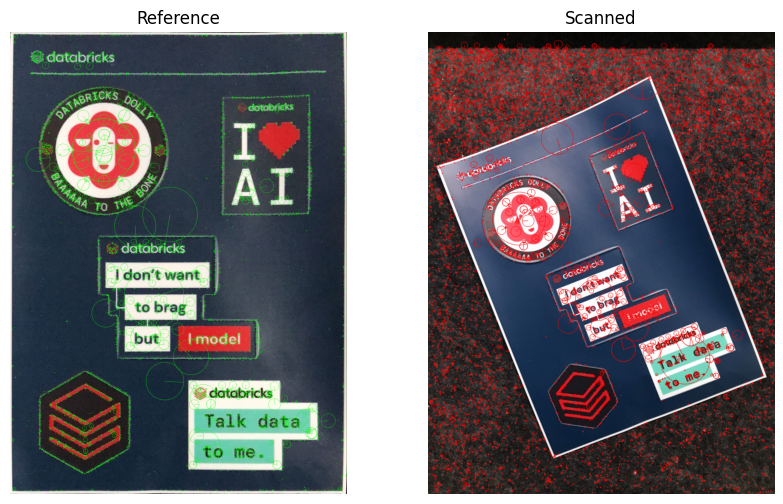

In [15]:
# Display the keypoints
im1_display = cv.drawKeypoints(im1, keypoints1, outImage=np.array([]), color=(0, 255, 0), flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
im2_display = cv.drawKeypoints(im2, keypoints2, outImage=np.array([]), color=(255, 0, 0), flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=[10,6]);
plt.subplot(121); plt.axis('off'); plt.imshow(im1_display); plt.title("Reference")
plt.subplot(122); plt.axis('off'); plt.imshow(im2_display); plt.title("Scanned")

# Step 3 : Match keypoints in the two image

In [16]:
# Brute Force (BF) Matcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(descriptors1,descriptors2,k=2) #2 descriptors nearest neighbors
# Apply ratio test - D-Lowe!
good = []
for m,n in matches:
  if m.distance < 0.50*n.distance:
    good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(im1,keypoints1,im2,keypoints2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

In [17]:
len(matches), len(good)

(6172, 508)

In [18]:
matches[1] #becuse we used knnMatch it returns 2 nearest neighbors for each descriptor in image1 has 2 bjects

(< cv2.DMatch 0000027F6B9C3F90>, < cv2.DMatch 0000027F6B9C0E90>)

In [19]:
matches[0][0].distance, matches[0][1].distance #the lower the distance the better the match

(146.16429138183594, 158.2971954345703)

In [20]:
good[0]  #1 dimensional

[< cv2.DMatch 0000027F0074B270>]

In [21]:
print(descriptors1[good[0][0].queryIdx])
print(descriptors2[good[0][0].trainIdx])

[ 30.   2.   0.   0.   0.   0.   0.   9. 135.   1.   0.   1.   0.   1.
   1.  36.  63.   2.  12.  34.  24.  71.  13.  15.   2.  10.  31.  11.
   7.  45.  76.  23.  52.   5.   0.   0.   0.   0.   0.  11. 135.   5.
   1.   6.   9.   0.   0.  25.  57.   4.  32. 135. 109.   7.   0.   3.
   8.  59. 126.  49.  16.   5.   5.   5.  53.  13.   0.   0.   0.   0.
   0.   0. 135.  25.   2.   1.  11.   6.   0.   9.  41.   7.   9.  17.
 127. 121.  28.   4.  10.   9.  10.   8.  18.  45. 121.  47.  18.  12.
   1.   0.   1.   1.   2.   1.  84. 121.  53.   0.   1.   1.   0.   0.
   9.  49. 135.   5.   5.  27.  12.   0.   0.   4. 135.  14.   0.   9.
  45.  10.]
[ 27.   3.   2.   0.   0.   0.   0.   4. 135.   1.   0.   1.   1.   2.
   1.  29.  57.   2.   6.  22.  41.  89.  18.  13.   5.   8.  15.   7.
  10.  42.  85.  39.  49.   3.   1.   0.   0.   0.   1.   7. 135.   4.
   2.   6.   6.   0.   0.  20.  59.   6.  42. 135.  83.   9.   2.   3.
   8.  67. 134.  41.  12.   5.  10.   7.  55.  15.   3.   1.   0.

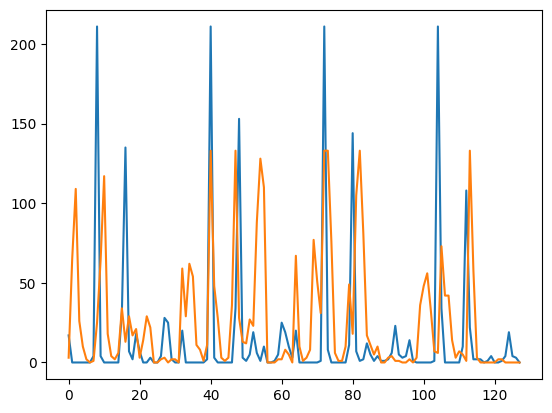

In [22]:
d1 = descriptors1[1]
d2 = descriptors2[1]
plt.plot(d1)
plt.plot(d2)

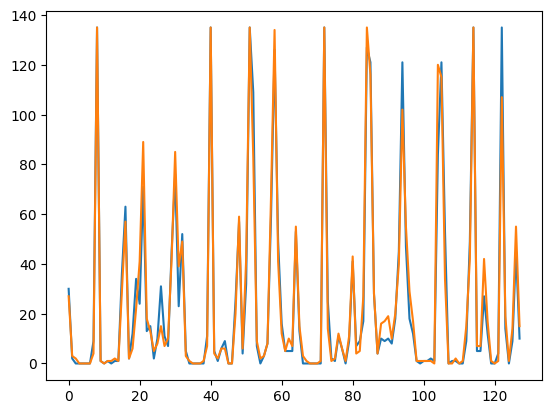

In [23]:
idx = 0
d1 = descriptors1[good[idx][0].queryIdx]
d2 = descriptors2[good[idx][0].trainIdx]
plt.plot(d1)
plt.plot(d2)

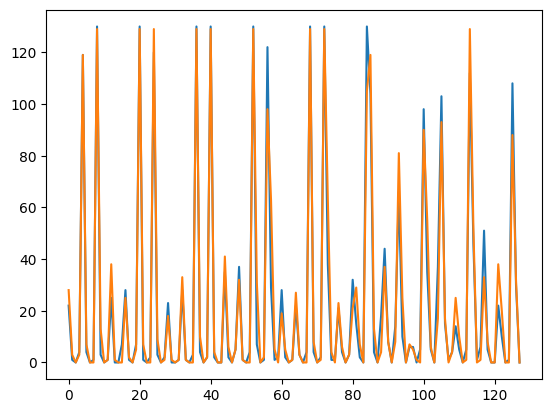

In [24]:
idx = 30
d1 = descriptors1[good[idx][0].queryIdx]
d2 = descriptors2[good[idx][0].trainIdx]
plt.plot(d1)
plt.plot(d2)

(np.float64(-0.5), np.float64(2953.5), np.float64(2537.5), np.float64(-0.5))

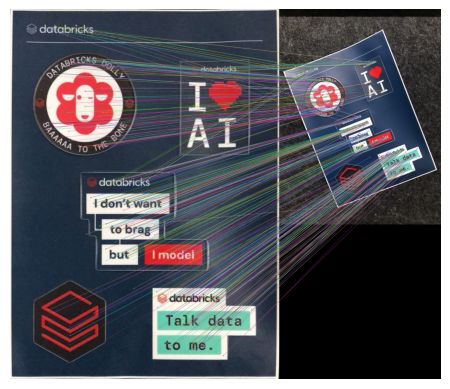

In [25]:
plt.imshow(img3)
plt.axis('off')

# Step 4:  Find Homography

In [26]:
# Extract location of good matches
points1 = np.zeros((len(good), 2), dtype=np.float32)
points2 = np.zeros((len(good), 2), dtype=np.float32)

for i, match in enumerate(good):
  points1[i, :] = keypoints1[match[0].queryIdx].pt   #(x,y)
  points2[i, :] = keypoints2[match[0].trainIdx].pt

# Find homography
h, mask = cv.findHomography(points2, points1, cv.RANSAC)

idx = 10
print("Homography")
print(h)
print("")
print("Point-1 (Reference)")
print(points1[idx, :])
print("")
print("Point-2 (scan)")
print(points2[idx, :])
print("")

print("Express point-2 (scan) in homogeneous coordinates")
p2_homo = np.append(points2[idx, :],1)  #append 1 
print(p2_homo)
print("")

p1_homo = np.matmul(h,p2_homo.T)
print("p1_homo = H * p2_homo")
print(p1_homo)
print("")
print("Normalized p1_homo (Reference)")
print (p1_homo/p1_homo[2])

Homography
[[ 2.36783998e+00 -9.12473187e-01  3.19055101e+02]
 [ 8.96504146e-01  2.44772441e+00 -1.08971338e+03]
 [-1.41953261e-05  3.23897217e-05  1.00000000e+00]]

Point-1 (Reference)
[278.10175 459.1334 ]

Point-2 (scan)
[201.40118 562.96124]

Express point-2 (scan) in homogeneous coordinates
[201.40118408 562.96124268   1.        ]

p1_homo = H * p2_homo
[282.253837   468.81759172   1.0153752 ]

Normalized p1_homo (Reference)
[277.97984067 461.71857515   1.        ]


 # Step 5: Warp image

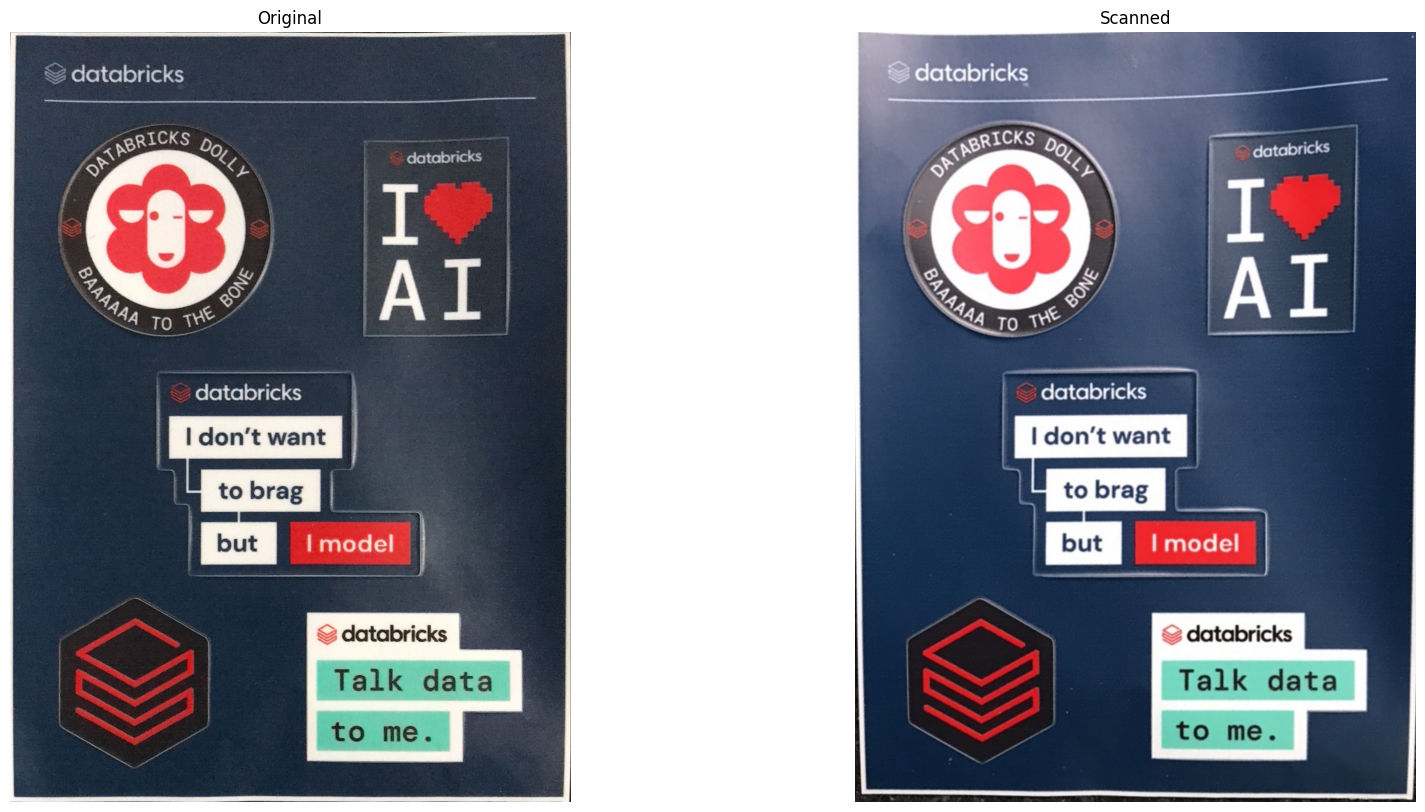

In [27]:
# Use homography to warp image
# Use homography to warp image
height, width, channels = im1.shape
im2_warped = cv.warpPerspective(im2, h, (width, height))
# Display results
plt.figure(figsize=[20,10])
plt.subplot(121); plt.imshow(im1); plt.axis('off'); plt.title("Original")
plt.subplot(122); plt.imshow(im2_warped); plt.axis('off'); plt.title("Scanned")
plt.show()